In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as  mg
import seaborn as sns

%matplotlib inline

In [134]:
train = pd.read_csv('agriculture_train.csv')

In [3]:
train1 = train.copy()

In [13]:
train1.dropna(inplace = True)

In [118]:
feature[pd.get_dummies(train.Season).columns] = pd.get_dummies(train.Season)

In [126]:
feature.drop(columns = ['Season'], inplace = True)

In [14]:
feature = train1.drop(columns = ['ID', 'Crop_Damage'])
target = train1.Crop_Damage

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
trainX, testX, trainY, testY = train_test_split(feature, target)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
le =LogisticRegression()

In [131]:
le.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [132]:
le.score(testX, testY)

0.8364638116704233

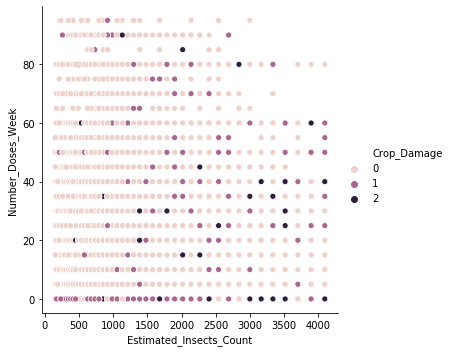

In [22]:
sns.relplot(x ='Estimated_Insects_Count', y = 'Number_Doses_Week', hue = 'Crop_Damage' , data = train1
           )

In [24]:
feature1 = train1[['Estimated_Insects_Count','Pesticide_Use_Category','Number_Weeks_Used','Number_Weeks_Quit']]

In [27]:
from sklearn.preprocessing  import StandardScaler

In [28]:
feature1 = StandardScaler().fit_transform(feature1)

In [29]:
trainX, testX, trainY, testY = train_test_split(feature1, target)

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = SVC(kernel = 'linear', random_state = 0,probability= True)

In [33]:
classifier.fit(trainX, trainY)

SVC(kernel='linear', probability=True, random_state=0)

In [35]:
from sklearn.metrics import roc_curve

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
re = RandomForestClassifier()
re.fit(trainX, trainY)

RandomForestClassifier()

In [43]:
from sklearn.model_selection import KFold

In [44]:
ke = KFold(n_splits= 4)

In [54]:
train.dropna(inplace  = True)

In [55]:
feature= train.drop(columns = ['ID', 'Crop_Damage'])

In [56]:
target = train.Crop_Damage

In [47]:
train1.dropna(inplace = True)

In [60]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(RandomForestClassifier(), feature, target)

array([0.82769847, 0.82481843, 0.82450538, 0.82712416, 0.82487008])

In [63]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [74]:
train['avg_dooses_per_week'] = train.Estimated_Insects_Count/train.Number_Doses_Week
train['total_doses'] = train.Number_Doses_Week * train.Number_Weeks_Used
train['total_number_of_weeeks'] = train.Number_Weeks_Quit +train.Number_Weeks_Used
# train['ratio_of_weeks'] = train.Number_Weeks_Used / train.Number_Weeks_Quit

In [76]:
train['ratio_of_weeks'] = train.Number_Weeks_Used // train.Number_Weeks_Quit

In [78]:
train.ratio_of_weeks.fillna(0, inplace = True)

In [83]:
train.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
avg_dooses_per_week        0
total_doses                0
total_number_of_weeeks     0
ratio_of_weeks             0
dtype: int64

In [96]:
feature.drop(columns = ['ratio_of_weeks'], inplace = True)

In [92]:
feature = train.drop(columns = ['ID', 'Crop_Damage'])
target = train.Crop_Damage

In [97]:
feature.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'avg_dooses_per_week', 'total_doses',
       'total_number_of_weeeks'],
      dtype='object')

In [110]:
feature.avg_dooses_per_week.unique()[0]

TypeError: 'numpy.dtype' object is not callable

In [111]:
feature.drop(columns= ['avg_dooses_per_week'],inplace = True)

In [112]:
trainX, testX, trainY, testY = train_test_split(feature, target)


In [113]:
le.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [114]:
le.score(testX, testY)

0.8396694214876033

In [115]:
re.fit(trainX, trainY)

RandomForestClassifier()

In [116]:
re.score(testX, testY)

0.8235411970949161

In [124]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'avg_dooses_per_week',
       'total_doses', 'total_number_of_weeeks', 'ratio_of_weeks'],
      dtype='object')

In [133]:
train.sample(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,avg_dooses_per_week,total_doses,total_number_of_weeeks,ratio_of_weeks
19092,F00033578,3165,0,0,2,5,28.0,27,2,0,633.00,140.0,55.0,1.0
42911,F00075235,2999,0,1,2,20,15.0,34,1,1,149.95,300.0,49.0,0.0


In [135]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [140]:
train[['cat1', 'cat2', 'cat3']] = pd.get_dummies(train.Pesticide_Use_Category)

In [142]:
train[['sea1', 'sea2', 'sea3']] = pd.get_dummies(train.Season)

In [148]:
train.dropna(inplace = True)

In [152]:
target.shape

(79858,)

In [149]:
feature = train.drop(columns = ['Season','Pesticide_Use_Category', 'Crop_Damage', 'ID'])
target = train.Crop_Damage

In [153]:
trainX, testX, trainY, testY = train_test_split(feature, target)

In [154]:
le.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [155]:
le.score(testX, testY)

0.8317054845980466